In [1]:
## define device.
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "7"

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# add . on dataframe 
def add_dot(df):
    cols = ['filename','mask_filename']
    for i in cols :
        #df[i] = df[i].apply(lambda x: '.' + x[1:])
        df[i] = df[i].str.replace('./dataset', '../dataset')
    return df

# encoder class str --> numeric
def encoder_class(dataframe):
    
    encoder = {'benign':1, 'malignant':2, 'normal':0}
    dataframe['class'] = [encoder[i] for i in dataframe['category']]
    
    return dataframe

"""
iunput dataset csv

"""
train_path = '../dataset/unet/dataset-train-augment.csv'
train_df = pd.read_csv(train_path)
train_df = add_dot(train_df)

val_path = '../dataset/unet/dataset-validate-augment.csv'
val_df = pd.read_csv(val_path)
val_df = add_dot(val_df)

test_path = '../dataset/unet/dataset-test-augment.csv'
test_df = pd.read_csv(test_path)
test_df = add_dot(test_df)

train_df = encoder_class(train_df)
val_df = encoder_class(val_df)
test_df = encoder_class(test_df)

print(train_df['category'].value_counts())
print(train_df['class'].value_counts())
print(val_df['category'].value_counts())
print(val_df['class'].value_counts())

category
benign       845
malignant    845
normal       845
Name: count, dtype: int64
class
1    845
2    845
0    845
Name: count, dtype: int64
category
benign       121
malignant    121
normal       121
Name: count, dtype: int64
class
1    121
2    121
0    121
Name: count, dtype: int64


# **Start**

In [2]:
import Unet

# import model UnetClassifier train from 2create-unet-classifier.ipynb In[4]
model = Unet.get_model()

In [3]:
test_df

,filename,mask_filename,category,class
0,../dataset/image-all/85060120-183.png,../dataset/unet/images-mark/85060120-183.png,benign,1
1,../dataset/image-all/756fe311-a7.png,../dataset/unet/images-mark/756fe311-a7.png,benign,1
2,../dataset/image-all/4dd9d7f3-jg.png,../dataset/unet/images-mark/4dd9d7f3-jg.png,benign,1
3,../dataset/image-all/bbcc9757-nq.png,../dataset/unet/images-mark/bbcc9757-nq.png,benign,1
4,../dataset/image-all/ee340ded-qw.png,../dataset/unet/images-mark/ee340ded-qw.png,benign,1
...,...,...,...,...
721,../dataset/image-all/normal-92221-92656..jpg,../dataset/unet/images-mark/normal-92221-92656...,normal,0
722,../dataset/image-all/normal-90545-35c78..jpg,../dataset/unet/images-mark/normal-90545-35c78...,normal,0
723,../dataset/image-all/normal-72081-8420d..jpg,../dataset/unet/images-mark/normal-72081-8420d...,normal,0
724,../dataset/image-all/normal-59843-8ab96..png,../dataset/unet/images-mark/normal-59843-8ab96...,normal,0


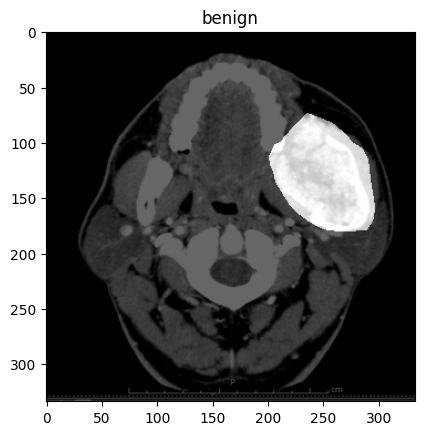

In [12]:
# actual image plot

index = 109
img_path = test_df.iloc[index, 0]
image = Image.open(img_path).convert('RGB')

mask_path = test_df.iloc[index, 1]
mask = Image.open(mask_path).convert('RGB')

plt.title(test_df.iloc[index, 2])
plt.imshow(image)
plt.imshow(mask,alpha=0.6)

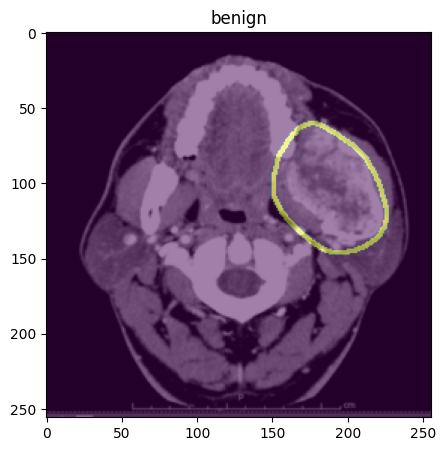

In [13]:
# model predict image plot
model.Classifier(image)